In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#MACRO DEF

STOCK = 'GOOG'
EPOCHS = 150

In [3]:


#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start='2012-01-01' , end='2022-03-04')

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780
...,...,...,...,...,...,...
2022-02-28,2712.810059,2656.504883,2665.689941,2697.820068,1483800.0,2697.820068
2022-03-01,2722.219971,2667.570068,2689.600098,2683.360107,1232000.0,2683.360107
2022-03-02,2712.310059,2668.649902,2692.165039,2695.030029,1198300.0,2695.030029


In [4]:
#get the number of rows and column in the data set
df.shape

(2560, 6)

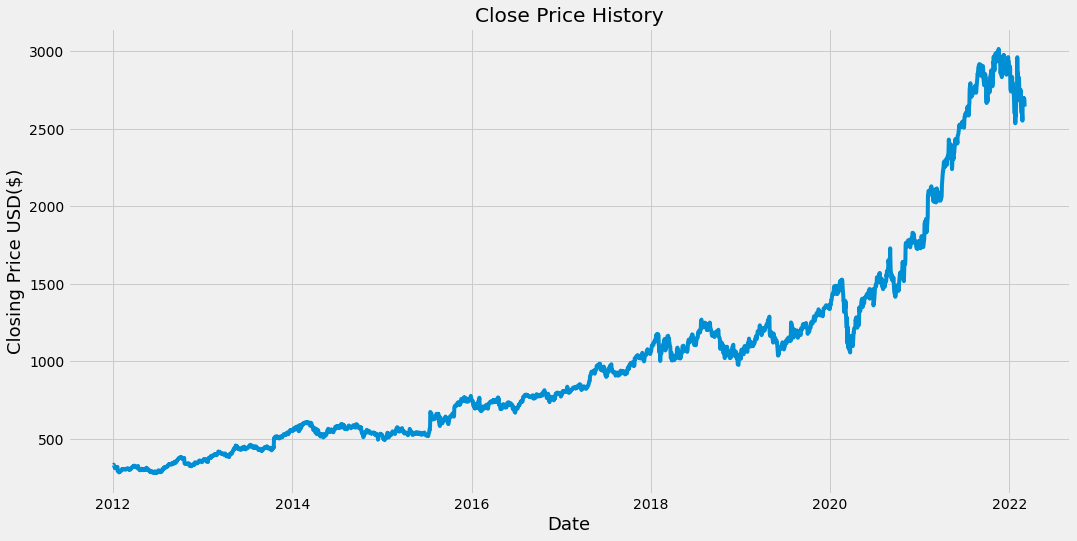

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2048

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01936668],
       [0.01988928],
       [0.01820133],
       ...,
       [0.8833388 ],
       [0.88009644],
       [0.86411516]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01936668, 0.01988928, 0.01820133, 0.01656438, 0.01154608,
       0.01166991, 0.01218339, 0.01285346, 0.01200677, 0.01266046,
       0.01344889, 0.01466159, 0.0049054 , 0.00481982, 0.00398405,
       0.00190099, 0.00164789, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474517, 0.00678818, 0.00911159, 0.00868915,
       0.00924999, 0.00954314, 0.00853257, 0.00967788, 0.0092336 ,
       0.00846884, 0.00864364, 0.00830132, 0.01000564, 0.0089022 ,
       0.00856898, 0.00925909, 0.00915165, 0.01080499, 0.0107795 ,
       0.01153516, 0.01132577, 0.01005116, 0.00835958, 0.00869462,
       0.00875653, 0.00750196, 0.00839417, 0.01069393, 0.01036799,
       0.01130391, 0.01201587, 0.01364372, 0.0135545 , 0.01473624,
       0.0158415 , 0.01521149, 0.01643874, 0.01601813, 0.01760956])]
[0.016271218787306516]

[array([0.01936668, 0.01988928, 0.01820133, 0.01656438, 0.01154608,
       0.01166991, 0.01218339, 0.01285346, 0.01200677, 0.01266046,
       0.01344889, 0.01466159, 0.0

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1988, 60, 1)

In [11]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
'''for i in range(10):
    model.fit(x_train, y_train, batch_size=32, epochs=i)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    print(valid)'''
    
    
    

    

"for i in range(10):\n    model.fit(x_train, y_train, batch_size=32, epochs=i)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)\n    #plot the date\n    train = data[:training_data_len]\n    valid = data[training_data_len:]\n    valid['Predictions'] = predictions\n    #

In [14]:
'''rmse=10
while(rmse>0.1):
    #train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)'''
    
    


'rmse=10\nwhile(rmse>0.1):\n    #train the model\n    model.fit(x_train, y_train, batch_size=32, epochs=1)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)'

In [15]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/150
63/63 [==============================] - 5s 38ms/step - loss: 0.0025
Epoch 2/150
63/63 [==============================] - 3s 46ms/step - loss: 9.9658e-05
Epoch 3/150
63/63 [==============================] - 2s 38ms/step - loss: 9.3334e-05
Epoch 4/150
63/63 [==============================] - 3s 42ms/step - loss: 9.6008e-05
Epoch 5/150
63/63 [==============================] - 3s 42ms/step - loss: 8.4722e-05
Epoch 6/150
63/63 [==============================] - 4s 70ms/step - loss: 9.1149e-05
Epoch 7/150
63/63 [==============================] - 3s 48ms/step - loss: 8.4526e-05
Epoch 8/150
63/63 [==============================] - 2s 38ms/step - loss: 8.5355e-05
Epoch 9/150
63/63 [==============================] - 2s 37ms/step - loss: 8.0765e-05
Epoch 10/150
63/63 [==============================] - 2s 38ms/step - loss: 1.0129e-04
Epoch 11/150
63/63 [==============================] - 4s 71ms/step - loss: 8.7219e-05
Epoch 12/150
63/63 [==============================] - 3s 44ms/step 

63/63 [==============================] - 5s 86ms/step - loss: 2.6896e-05
Epoch 97/150
63/63 [==============================] - 5s 85ms/step - loss: 2.7636e-05
Epoch 98/150
63/63 [==============================] - 6s 90ms/step - loss: 2.5614e-05
Epoch 99/150
63/63 [==============================] - 5s 86ms/step - loss: 2.4125e-05
Epoch 100/150
63/63 [==============================] - 5s 84ms/step - loss: 2.7667e-05
Epoch 101/150
63/63 [==============================] - 5s 84ms/step - loss: 2.3276e-05
Epoch 102/150
63/63 [==============================] - 5s 87ms/step - loss: 2.3562e-05
Epoch 103/150
63/63 [==============================] - 5s 85ms/step - loss: 2.2329e-05
Epoch 104/150
63/63 [==============================] - 5s 84ms/step - loss: 2.3359e-05
Epoch 105/150
63/63 [==============================] - 5s 85ms/step - loss: 3.0492e-05
Epoch 106/150
63/63 [==============================] - 5s 84ms/step - loss: 2.2962e-05
Epoch 107/150
63/63 [==============================] - 6s 88

In [16]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
    


In [17]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

56.42037296295166


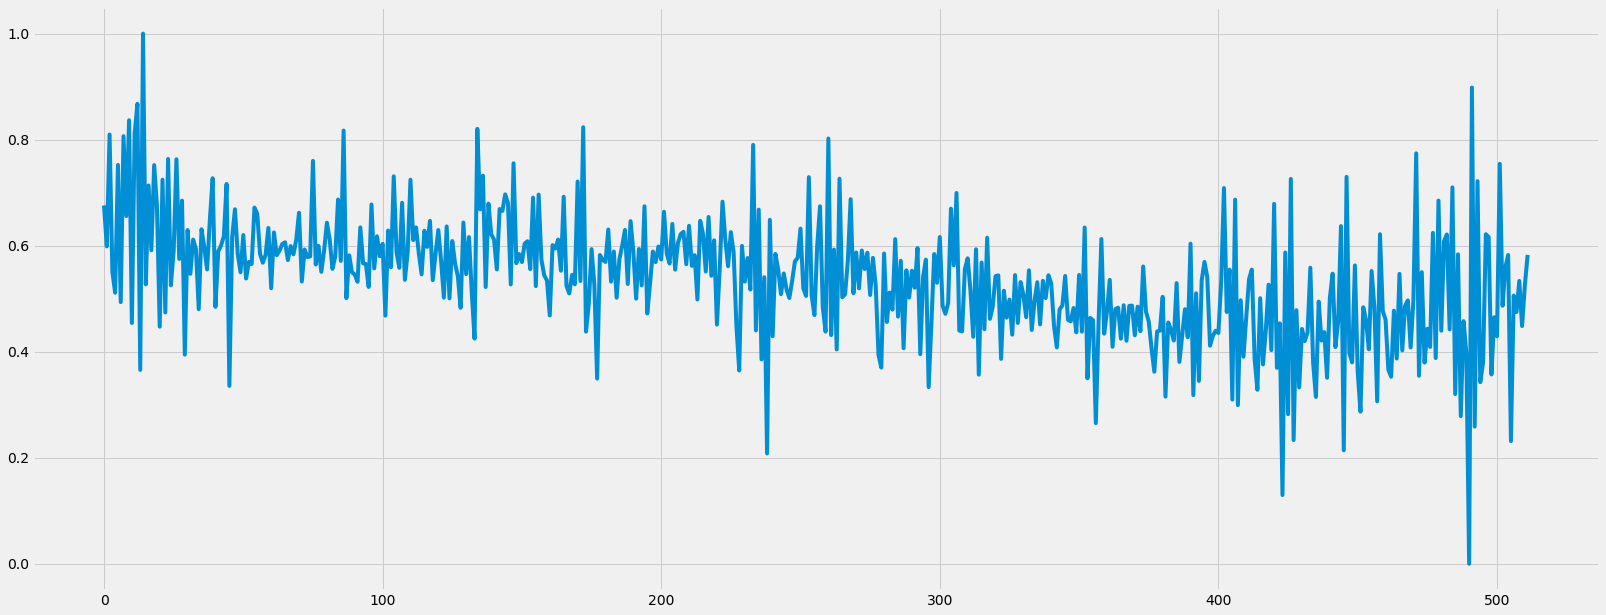

In [20]:
#get the root mean squared error (RMSE)
error = []
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error)
#plt.show()
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
#print(predictions)

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


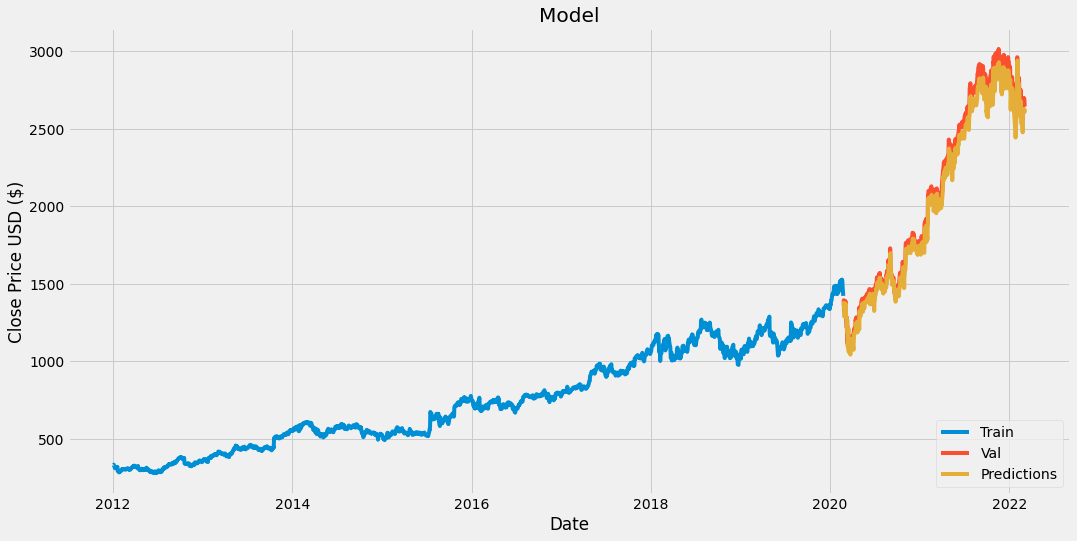

In [21]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Error'] = nperr
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [22]:
#show the valid and predicted prices
valid

,Close,Predictions,Error
Date,,,
2020-02-25,1388.449951,1387.045166,-1.404785
2020-02-26,1393.180054,1361.239014,-31.941040
2020-02-27,1318.089966,1369.678711,51.588745
2020-02-28,1339.329956,1288.311523,-51.018433
2020-03-02,1389.109985,1322.506348,-66.603638
...,...,...,...
2022-02-28,2697.820068,2616.832520,-80.987549
2022-03-01,2683.360107,2625.595703,-57.764404
2022-03-02,2695.030029,2603.562500,-91.467529


In [23]:
#get the Quote
apple_quote = web.DataReader(STOCK, data_source = 'yahoo', start='2012-01-01', end='2022-03-04')
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_df.tail()

[[1703.2721]]


,Close
Date,
2022-02-28,2697.820068
2022-03-01,2683.360107
2022-03-02,2695.030029
2022-03-03,2686.159912
2022-03-04,2642.439941


In [24]:
pred_price + rmse*2.493

array([[1843.9281]], dtype=float32)

In [25]:
apple_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start='2022-03-04', end='2022-03-07')
print(apple_quote2['Close'])

Date
2022-03-03    2686.159912
2022-03-04    2642.439941
Name: Close, dtype: float64


In [26]:
import joblib

joblib.dump(model,'machine learning model/GOOG_model.pkl')
    


INFO:tensorflow:Assets written to: ram://10458b87-78d6-4f46-8696-e23949733b07/assets


INFO:tensorflow:Assets written to: ram://10458b87-78d6-4f46-8696-e23949733b07/assets


['machine learning model/GOOG_model.pkl']

In [27]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)